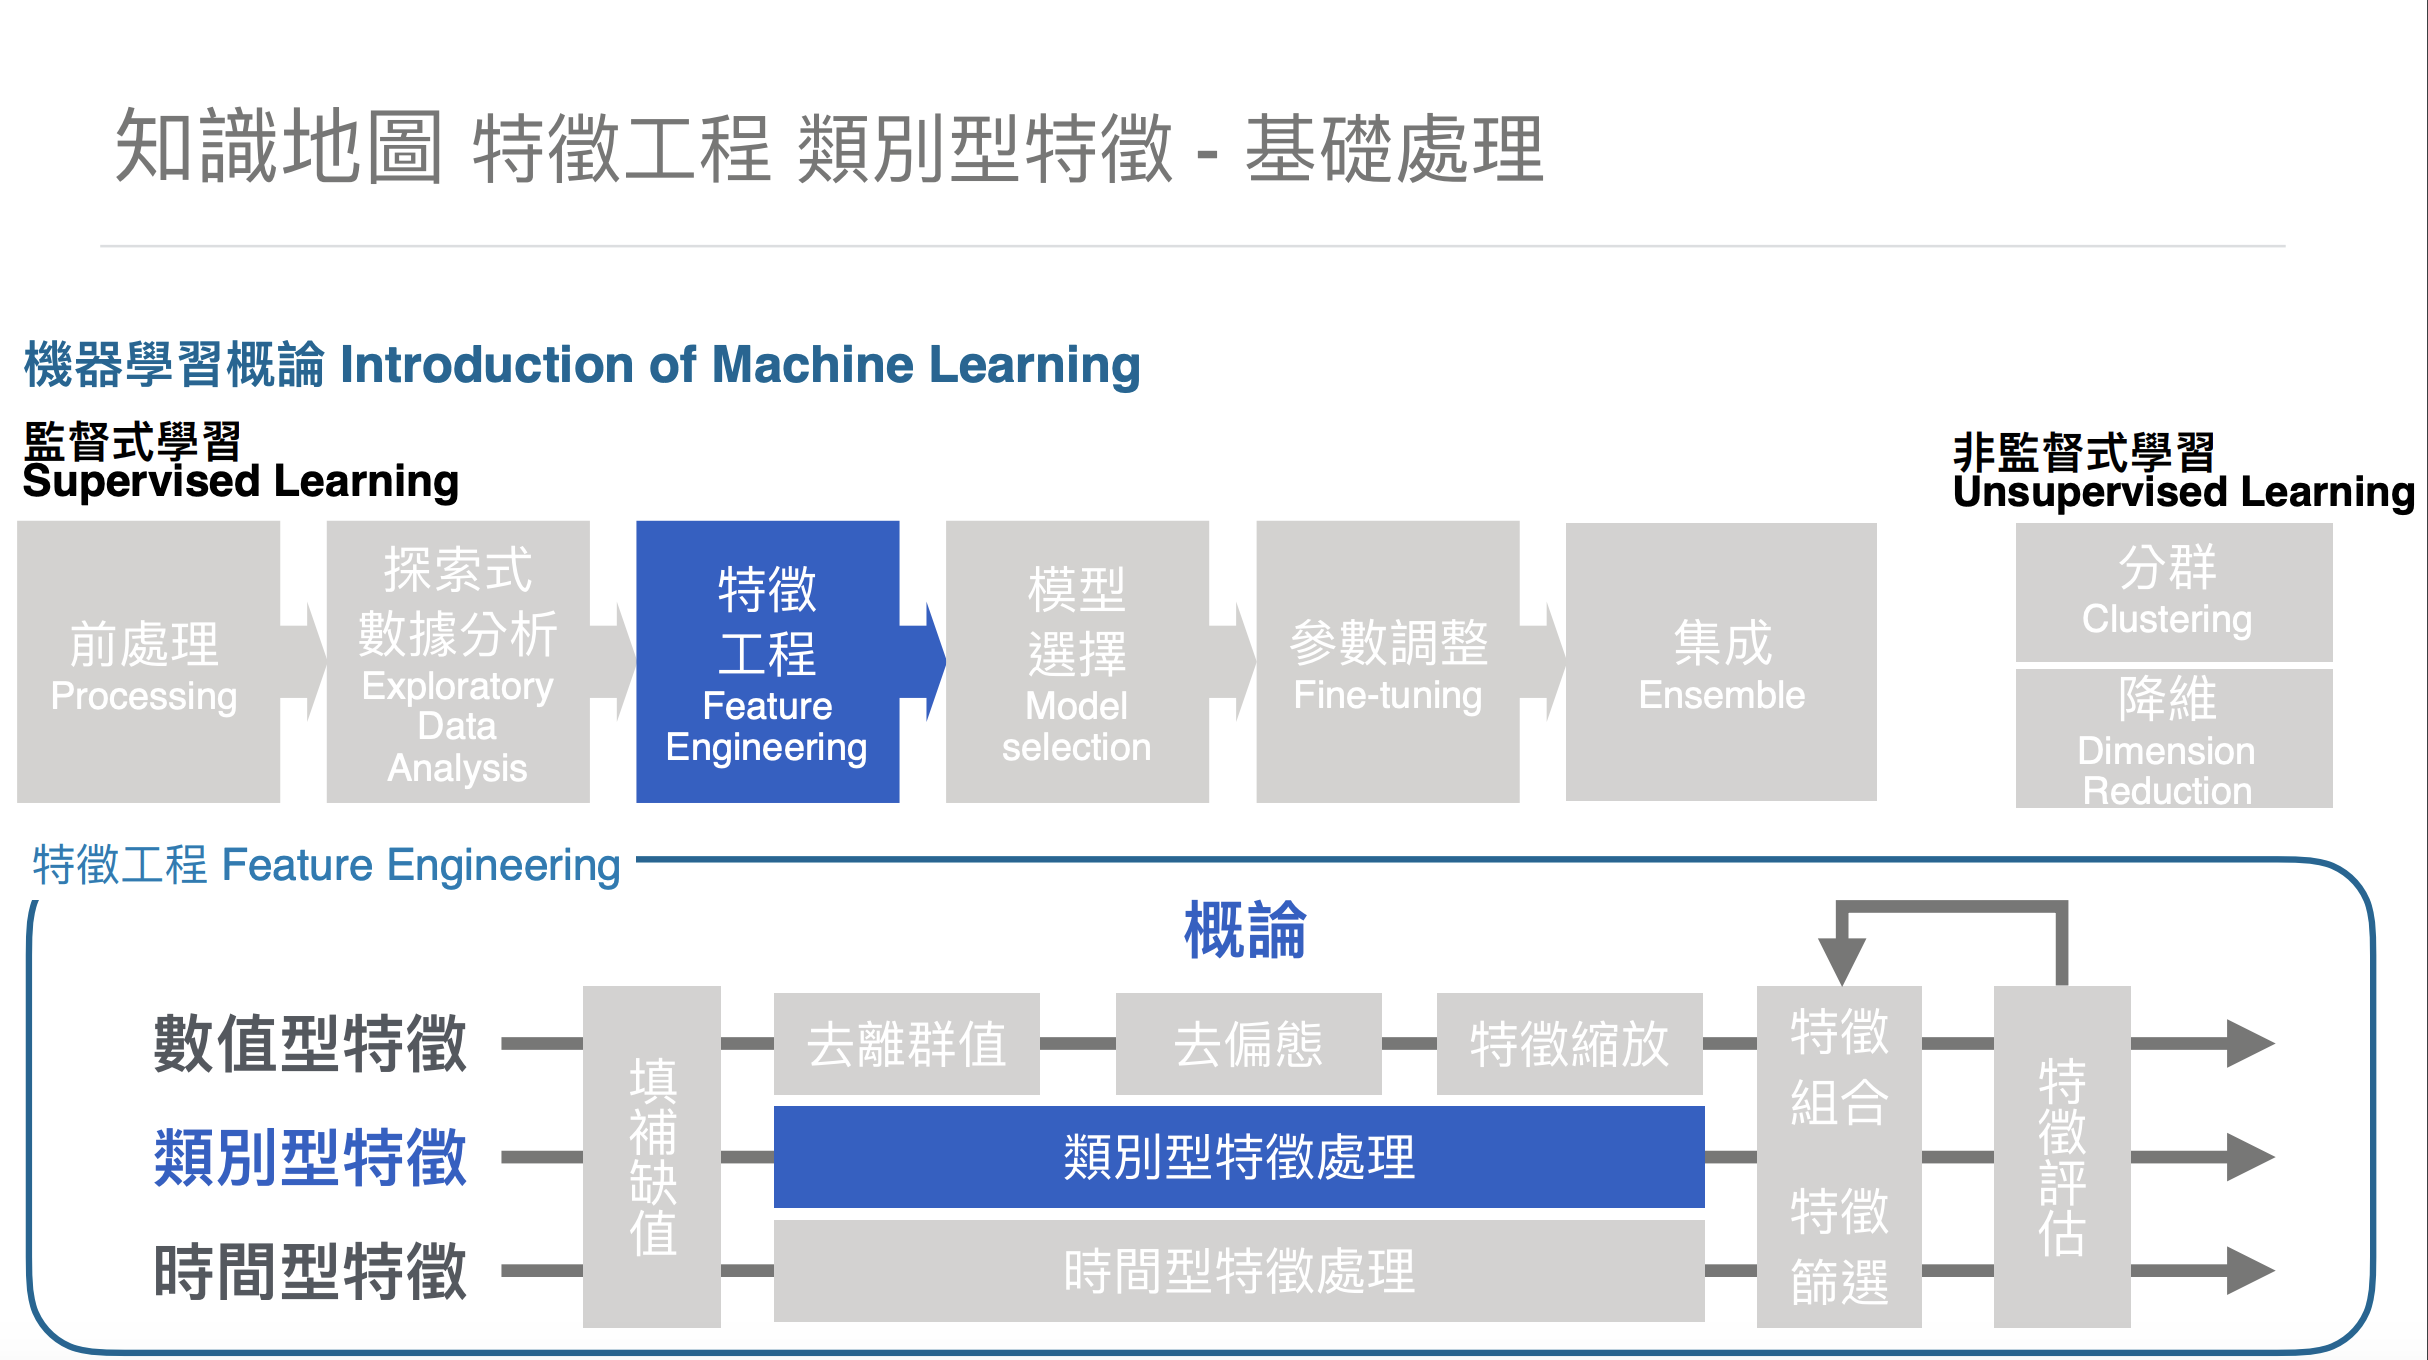

## 範例 : (Kaggle)房價預測

以下用房價預測資料, 觀查標籤編碼與獨編碼熱的影響

## [教學目標]

以下用房價預測資料, 觀查標籤編碼與獨編碼熱的影響

## [範例重點]

觀察標籤編碼與獨熱編碼, 在特徵數量 / 線性迴歸分數 / 線性迴歸時間上, 分別有什麼影響 (In[3], Out[3], In[4], Out[4]

觀察標籤編碼與獨熱編碼, 在特徵數量 / 梯度提升樹分數 / 梯度提升樹時間上, 分別有什麼影響 (In[5], Out[5], In[6], Out[6])

In [1]:
# 做完特徵工程前的所有準備
import pandas as pd
import numpy as np
import copy, time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

data_path = '/Users/johnsonhuang/py_ds/ML_100/2nd-ML100Days/homework/data/Part02/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')
df_test = pd.read_csv(data_path + 'house_test.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
ids = df_test['Id']
df_train = df_train.drop(['Id', 'SalePrice'] , axis=1)
df_test = df_test.drop(['Id'] , axis=1)
df = pd.concat([df_train, df_test])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [2]:
#只取類別值 (object) 型欄位, 存於 object_features 中
object_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'object':
        object_features.append(feature)
print(f'{len(object_features)} Object Features : {object_features}\n')

# 只留類別型欄位
df = df[object_features]
df = df.fillna('None')
train_num = train_Y.shape[0]
df.head()

43 Object Features : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']



,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [3]:
# 標籤編碼
df_temp = pd.DataFrame()
for c in df.columns:
    df_temp[c] = LabelEncoder().fit_transform(df[c])

# 線性迴歸
train_X = df_temp[:train_num]
estimator = LinearRegression()
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')
print(f'time : {time.time() - start} sec')

shape : (1460, 43)
score : 0.6615606866851304
time : 0.22030401229858398 sec


In [4]:
# 獨熱編碼
df_temp = pd.get_dummies(df)

# 線性迴歸
train_X = df_temp[:train_num]
estimator = LinearRegression()
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')
print(f'time : {time.time() - start} sec')

shape : (1460, 274)
score : -6.814699935381791e+22
time : 0.08742904663085938 sec


In [5]:
# 標籤編碼
df_temp = pd.DataFrame()
for c in df.columns:
    df_temp[c] = LabelEncoder().fit_transform(df[c])

# 梯度提升樹
train_X = df_temp[:train_num]
estimator = GradientBoostingRegressor()
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')
print(f'time : {time.time() - start} sec')

shape : (1460, 43)
score : 0.7777258100888252
time : 0.6629290580749512 sec


In [6]:
# 獨熱編碼
df_temp = pd.get_dummies(df)

# 梯度提升樹
train_X = df_temp[:train_num]
estimator = GradientBoostingRegressor()
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')
print(f'time : {time.time() - start} sec')

shape : (1460, 274)
score : 0.792528414780778
time : 2.295689821243286 sec


## 作業

## [(Kaggle)鐵達尼生存預測](https://www.kaggle.com/c/titanic)

## [作業目標]

試著模仿範例寫法, 在鐵達尼生存預測中, 觀察標籤編碼與獨編碼熱的影響

## [作業重點]

回答在範例中的觀察結果

觀察標籤編碼與獨熱編碼, 在特徵數量 / 邏輯斯迴歸分數 / 邏輯斯迴歸時間上, 分別有什麼影響 (In[3], Out[3], In[4], Out[4])

In [7]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy, time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

data_path = '/Users/johnsonhuang/py_ds/ML_100/2nd-ML100Days/homework/data/Part02/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# 只取類別值 (object) 型欄位, 存於 object_features 中
object_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'object':
        object_features.append(feature)
print(f'{len(object_features)} Numeric Features : {object_features}\n')

# 只留類別型欄位
df = df[object_features]
df = df.fillna('None')
train_num = train_Y.shape[0]
df.head()

5 Numeric Features : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']



,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,None,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,None,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,None,S


## 作業1

觀察範例，在房價預測中調整標籤編碼(Label Encoder) / 獨熱編碼 (One Hot Encoder) 方式，

對於線性迴歸以及梯度提升樹兩種模型，何者影響比較大?

> 對線性迴歸的影響較大


## 作業2

鐵達尼號例題中，標籤編碼 / 獨熱編碼又分別對預測結果有何影響? (Hint : 參考今日範例)

In [9]:
# 標籤編碼 + 羅吉斯迴歸

"""
Your Code Here
"""

# 標籤編碼
df_temp = pd.DataFrame()
for c in df.columns:
    df_temp[c] = LabelEncoder().fit_transform(df[c])

# 羅吉斯迴歸
train_X = df_temp[:train_num]
estimator = LogisticRegression()
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')
print(f'time : {time.time() - start} sec')

shape : (891, 5)
score : 0.780004837244799
time : 0.02858901023864746 sec


In [10]:
# 獨熱編碼 + 羅吉斯迴歸

"""
Your Code Here
"""

# 獨熱編碼
df_temp = pd.get_dummies(df)

# 羅吉斯迴歸
train_X = df_temp[:train_num]
estimator = LogisticRegression()
start = time.time()
print(f'shape : {train_X.shape}')
print(f'score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')
print(f'time : {time.time() - start} sec')

shape : (891, 2429)
score : 0.8013346043513216
time : 0.11059904098510742 sec


## 參考資料


## [數據預處理：獨熱編碼（One-Hot Encoding）和 LabelEncoder標籤編碼](https://www.twblogs.net/a/5baab6e32b7177781a0e6859/zh-cn/)

其實 One Hot Encoding 與 Label Encoder 是類別型資料最常見的編碼方式，因此實現的程式碼也頗為常用，其中 One Hot Encoding 常見的兩種做法 : pandas.get_dummies 與 sklearn 的 OneHotEncoder 在這網頁中都有清楚的展示，本課程今日範例中會用到前者，在之後的葉編碼中則會用到後者，所以同學不妨先了解一下寫法。

![image](https://lh4.googleusercontent.com/JjiReNfAyMbXQ1LwrTS4lUPR8Hrg_nFyVjRuj7RAogDTcwXkHgtKMqHHUsuSY6daXh8prnvOttDd852VwVvVrZ2CxVCe1fyA2TWj6e9Gw5ZAWuqvwSv_vFKM-9OXon8s2yknrwH-9YM?t=1557119953141)